# predict_mobile_phone_pricing

### objective

#### Build a system that can predict pricing for a mobile phone using data on available phones in the
market. Predict if the mobile can be priced low/med/high/very high. Explore the data t
understand the features and figure out an approach.

## import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
#print(os.listdir())
#import warnings
#warning.filterwarnings('ignore')

### load Dataset

In [7]:
df_price=pd.read_csv("C:\\Users\\Pankaj\\OneDrive\\Documents\\mobile_price_train.csv")

In [8]:
type(df_price)

pandas.core.frame.DataFrame

## shape of dataset

In [10]:
df_price.shape

(2000, 21)

## to know about the columns

In [12]:
df_price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
df_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [14]:
# generate a sample random row or column
df_price.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
857,1550,1,2.5,0,6,0,21,0.8,133,2,...,268,832,2338,16,1,15,0,1,0,2
41,1646,1,2.3,0,8,1,41,0.2,185,2,...,1725,1932,3339,18,10,19,1,1,0,3
552,726,0,2.9,0,0,0,43,0.1,101,8,...,666,760,1446,17,2,8,1,1,0,0
21,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
335,803,0,0.8,1,0,0,18,0.3,106,4,...,627,935,2801,18,15,12,0,1,0,2


## univeriate analysis
### our feature of interest is price_range
### identifying class labels or target variable with no of record associated

In [16]:
# identifying unique no of values
print("Total no of clases(Price Range)")
print(len(df_price.price_range.unique()))

Total no of clases(Price Range)
4


In [17]:
# looking at the unique values
df_price["price_range"].unique()

array([1, 2, 3, 0], dtype=int64)

In [18]:
# frequency distribution of target variable
# no of instances (rows) that belong to each class. we can view this as an absolute count.
df_price.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

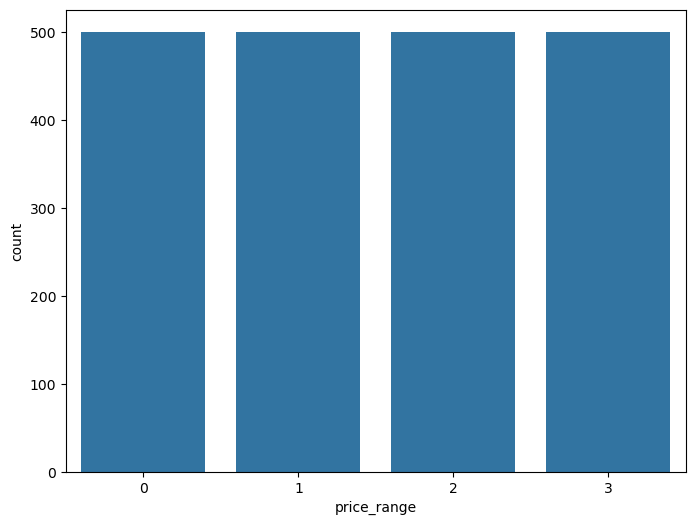

In [19]:
# visualizing the frequency distibution by graph
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x="price_range",data=df_price)
plt.show()

### frequency distribution of price_range variable w.r.t different features

In [21]:
df_price.groupby('battery_power')['price_range'].value_counts()

battery_power  price_range
501            1              1
               2              1
502            1              1
               2              1
503            0              1
                             ..
1995           2              1
1996           1              1
               2              1
1997           2              1
1998           2              1
Name: count, Length: 1669, dtype: int64

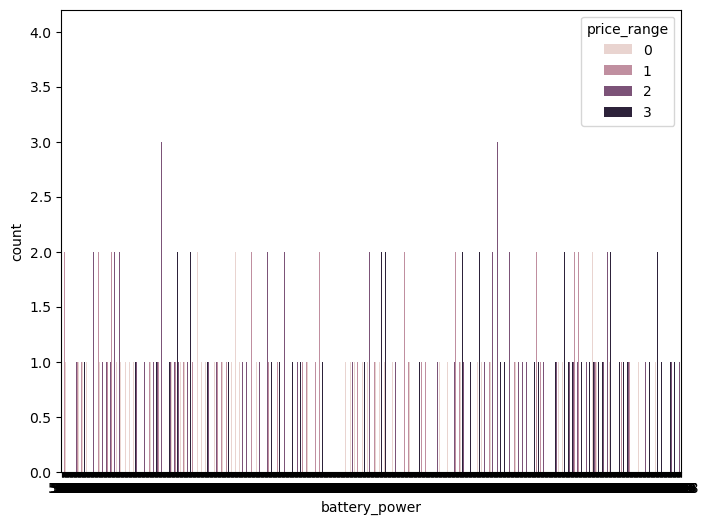

In [22]:
# visualizig count of the 'battery power' variable wrt targer
f , ax = plt.subplots(figsize=(8,6))
ax=sns.countplot(x="battery_power", hue="price_range", data=df_price)
plt.show()

## statistics of Data

In [24]:
# data description in second.... using pandas
df_price.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
# getting info about attributes,their datatypes,their datatype and null value
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [26]:
df_price.shape

(2000, 21)

# now removing the data points with missing data

In [28]:
df_price_final=df_price[df_price['sc_w'] !=0]
df_price_final.shape

(1820, 21)

## Data distribution

#### let us analyse some data features and see their distribution.
#### first, we see how the battery MAh is spread

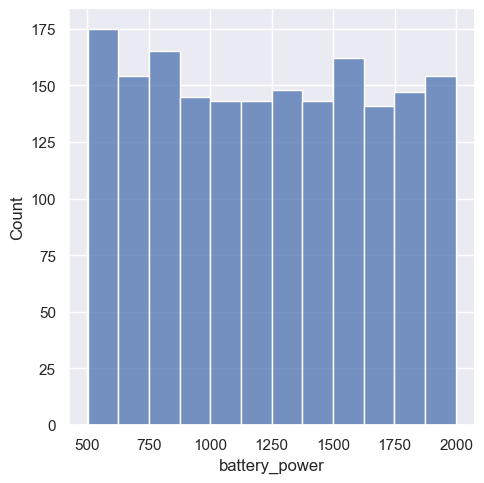

In [30]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df_price_final["battery_power"])
plt.show()

## now, we see the count of how many devices have bluetooth and how many don't.

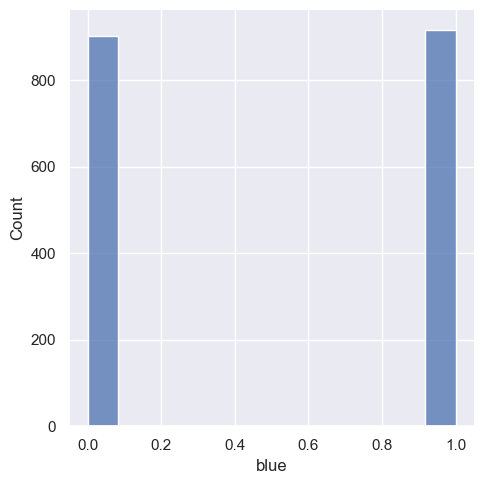

In [32]:
sns.set(rc={'figure.figsize':(6,7)})
ax=sns.displot(data=df_price_final["blue"])
plt.show()

## now, we can see the mobile depth (in cm).

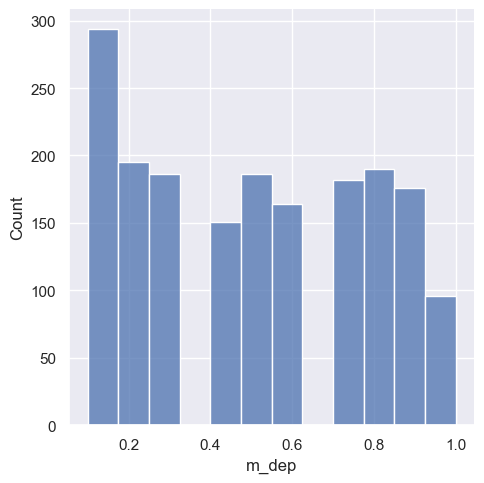

In [34]:
sns.set(rc={'figure.figsize':(6,7)})
ax=sns.displot(data=df_price_final["m_dep"])
plt.show()

## now , we see the dual sim

sns.set(rc={'figure.figsize':(6,7)})
ax=sns.displot(data=df_price_final["dual_sim"])
plt.show()

## now , we see the RAM

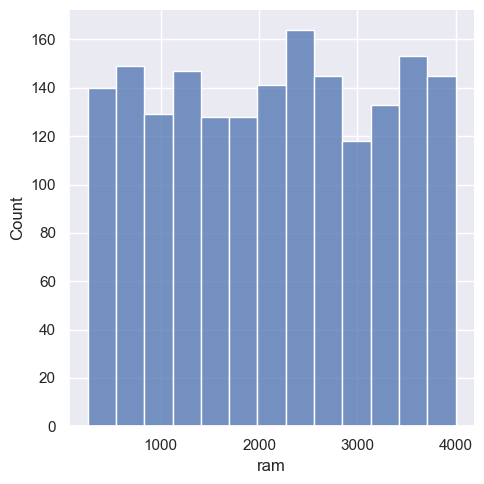

In [38]:
sns.set(rc={'figure.figsize':(6,7)})
ax=sns.displot(data=df_price_final["ram"])
plt.show()

## we can see the data distribution for all the data features as we did above

# class label or target variable

### analysing the 'Price Range' variable

In [42]:
df_price_final["price_range"].describe()

count    1820.000000
mean        1.509341
std         1.119285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: price_range, dtype: float64

# bivariate analysis

### checking correlation b/w columns and correlation b/w features and 'target'

In [45]:
print(df_price_final.corr()["price_range"].sort_values(ascending=False))

price_range      1.000000
ram              0.917026
battery_power    0.194030
px_width         0.150561
px_height        0.150052
int_memory       0.051887
sc_w             0.031852
blue             0.028416
sc_h             0.024488
pc               0.023218
dual_sim         0.023006
wifi             0.020901
fc               0.017603
three_g          0.016767
four_g           0.014336
talk_time        0.011107
m_dep            0.003064
clock_speed     -0.004004
n_cores         -0.010310
mobile_wt       -0.023872
touch_screen    -0.034013
Name: price_range, dtype: float64


## analysis of the features positively corelated with the target

### analysis of 'ram' and 'price range' variable  

In [47]:
# unique values in 'ram'
df_price_final['ram'].nunique()

1455

In [48]:
# frequency distribution of 'ram'
df_price_final['ram'].value_counts()

ram
2610    4
2227    4
1464    4
1958    3
1277    3
       ..
2078    1
995     1
2406    1
2027    1
3919    1
Name: count, Length: 1455, dtype: int64

In [49]:
# frequency distribution of 'battery power'
df_price_final['battery_power'].value_counts()

battery_power
1589    6
1872    6
618     6
1512    5
1807    5
       ..
878     1
906     1
1064    1
903     1
858     1
Name: count, Length: 1052, dtype: int64

### same like above we can also perform analysis for other features

# multivariate analysis

### multivariate analysis are performed to discover patterns and relationship in the dataset

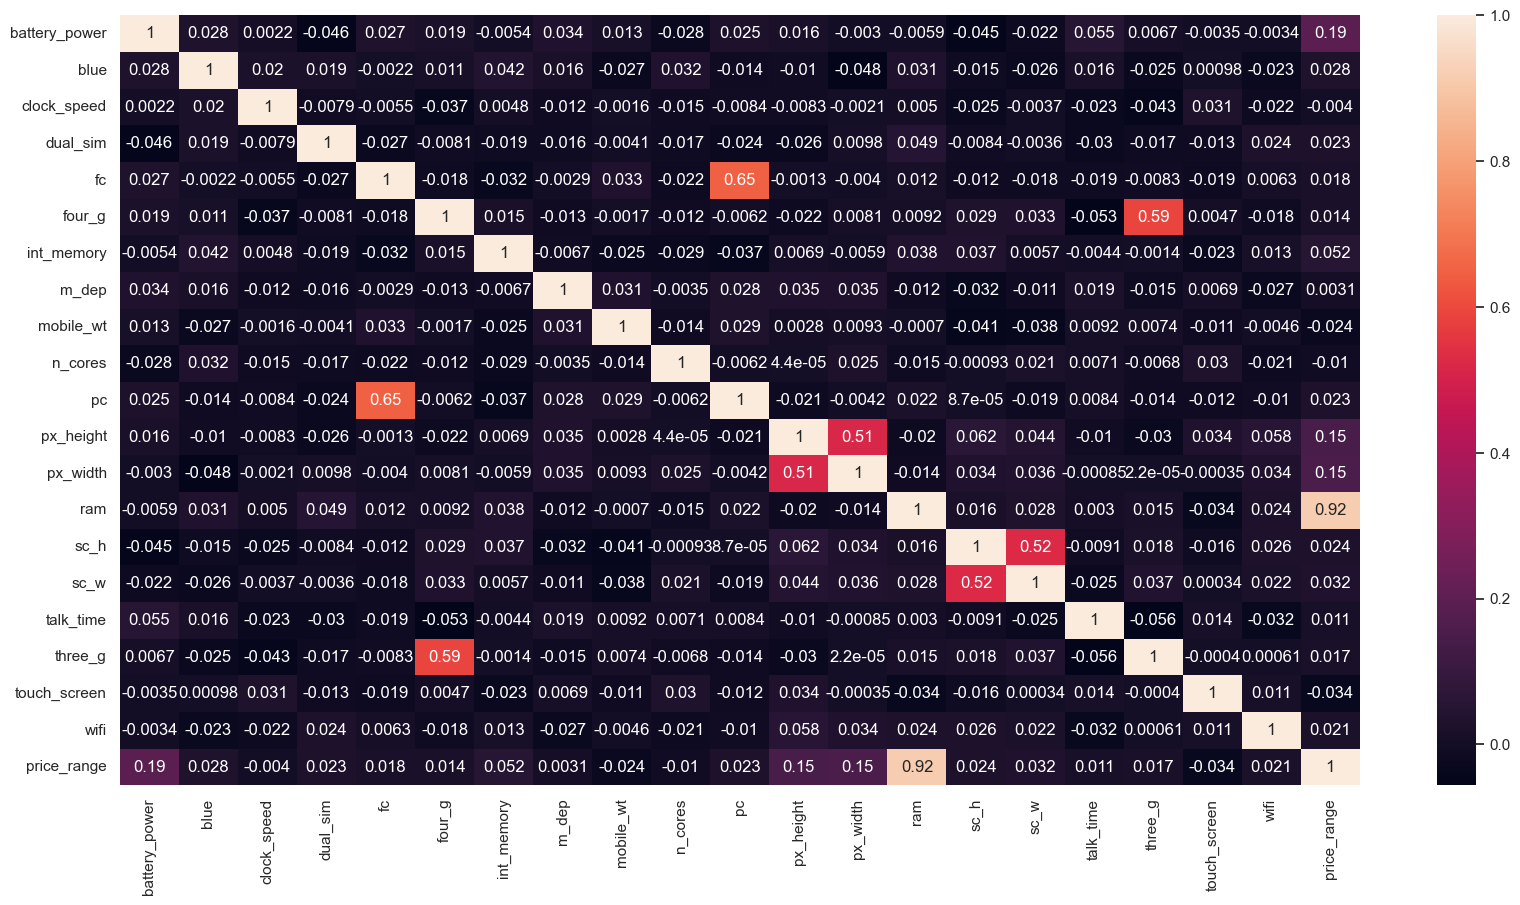

In [52]:
# heatmap to show the correlation b/w features vs price_range(target variable)

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_price_final[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']].corr(), annot=True)
plt.show()

# Train Test split

In [54]:
from sklearn.model_selection import train_test_split

print("number of instance and features",df_price_final.shape)
num_of_classes= len(df_price_final.price_range.unique())
print("number of class",num_of_classes)

number of instance and features (1820, 21)
number of class 4


In [55]:
from sklearn.model_selection import train_test_split

features = df_price_final.drop("price_range",axis=1)
target = df_price_final["price_range"]

X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.20,random_state=0)

In [56]:
X_train.shape

(1456, 20)

In [57]:
X_test.shape

(364, 20)

In [58]:
Y_train.shape

(1456,)

In [59]:
Y_test.shape

(364,)

In [60]:
y = df_price_final.price_range
X= df_price_final.drop('price_range',axis=1)
print(y.shape)
print(X.shape)

(1820,)
(1820, 20)


In [61]:
# summary of train test set
print("Shape of X_train:"+str(X_train.shape))
print("Shape of Y_train:"+str(Y_train.shape))
print("Shape of X_test:"+str(X_test.shape))
print("Shape of Y_test:"+str(Y_test.shape))

Shape of X_train:(1456, 20)
Shape of Y_train:(1456,)
Shape of X_test:(364, 20)
Shape of Y_test:(364,)


# A function to create classification report and confusion matrix

In [63]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_tittle):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('predicted values')
    plt.ylabel('Actual values')
    plt.title(plt_title)
    plt.show()
    return cm

# V.Model Fitting

### logistic regression

In [66]:
# ![image.png](attachment:image.png)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, recall_score,f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [69]:
Y_pred_lr.shape

(364,)

Logistic Regression Classifier Accuracy Score: <function accuracy_score at 0x000002E13894C2C0>
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        91
           1       0.57      0.50      0.53       104
           2       0.38      0.43      0.40        77
           3       0.72      0.75      0.73        92

    accuracy                           0.62       364
   macro avg       0.61      0.61      0.61       364
weighted avg       0.62      0.62      0.62       364



NameError: name 'plt_title' is not defined

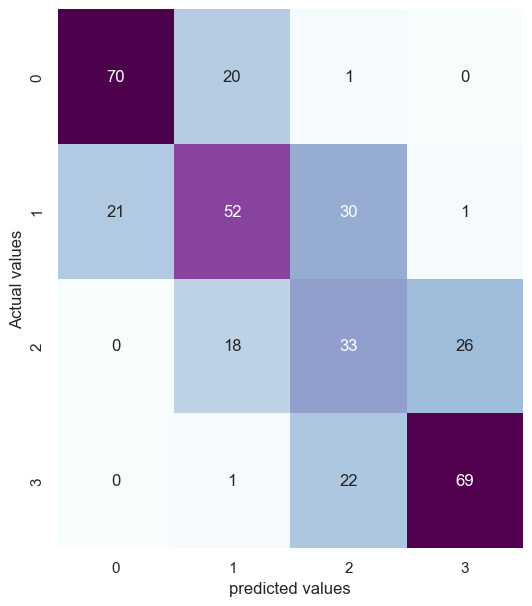

In [70]:
print('Logistic Regression Classifier Accuracy Score:',accuracy_score)
cm_rfc=my_confusion_matrix(Y_test, Y_pred_lr, 'Logistic Regression')

# To check the accuracy Another Method

In [71]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [73]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is:"+str(score_lr))

The accuracy score achieved using Logistic Regression is:61.54


# Confusion Matrix and classification report

In [75]:
print(metrics.confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_test, Y_pred_lr))

[[70 21  0  0]
 [20 52 18  1]
 [ 1 30 33 22]
 [ 0  1 26 69]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        91
           1       0.57      0.50      0.53       104
           2       0.38      0.43      0.40        77
           3       0.72      0.75      0.73        92

    accuracy                           0.62       364
   macro avg       0.61      0.61      0.61       364
weighted avg       0.62      0.62      0.62       364



## Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [80]:
Y_pred_nb.shape

(364,)

In [84]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using NaiveBayes is:"+str(score_nb))

The accuracy score achieved using NaiveBayes is:80.22


In [86]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_test, Y_pred_nb))

[[84 10  0  0]
 [ 7 71 15  0]
 [ 0 23 52  7]
 [ 0  0 10 85]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        91
           1       0.76      0.68      0.72       104
           2       0.63      0.68      0.65        77
           3       0.89      0.92      0.91        92

    accuracy                           0.80       364
   macro avg       0.80      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364



Navie Bayes: 0.8021978021978022
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        91
           1       0.76      0.68      0.72       104
           2       0.63      0.68      0.65        77
           3       0.89      0.92      0.91        92

    accuracy                           0.80       364
   macro avg       0.80      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364



NameError: name 'plt_title' is not defined

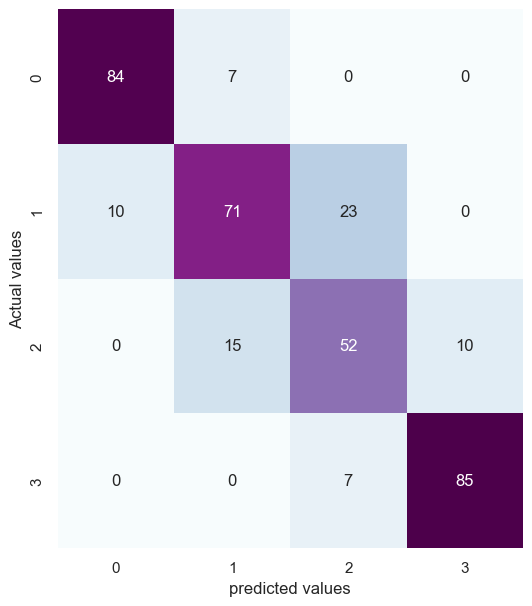

In [88]:
print('Navie Bayes:',accuracy_score(Y_test,Y_pred_nb))
cm_rfc=my_confusion_matrix(Y_test,Y_pred_nb, 'Navie Bayes')

# SVM

In [91]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train,Y_train)

Y_pred_svm = sv.predict(X_test)

In [92]:
Y_pred_svm.shape

(364,)

In [95]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("the accuracy score achieved using Linear SVM is:"+str(score_svm))

the accuracy score achieved using Linear SVM is:97.25


print('SVM:',accuracy_score(Y_test,Y_pred_svm))
cm_rfc=my_confusion_matrix(Y_test,Y_pred_svm, 'SVM')

# K Nearest Neighbors

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [102]:
Y_pred_knn.shape

(364,)

In [104]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("the accuracy score achieved using Linear KNN is:"+str(score_knn))

the accuracy score achieved using Linear KNN is:94.23


KNN: 0.9423076923076923
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.95      0.92      0.94       104
           2       0.87      0.96      0.91        77
           3       0.99      0.92      0.96        92

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364



NameError: name 'plt_title' is not defined

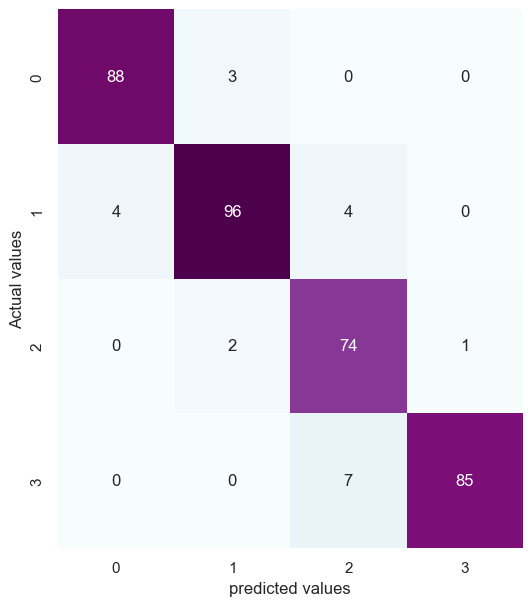

In [106]:
print('KNN:',accuracy_score(Y_test,Y_pred_knn))
cm_rfc=my_confusion_matrix(Y_test,Y_pred_knn, 'KNN')

# Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt=DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [119]:
print(Y_pred_dt.shape)

(364,)


In [121]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("the accuracy score achieved using Decision Tree is:"+str(score_dt))

the accuracy score achieved using Decision Tree is:84.34


Decision Tree: 0.8434065934065934
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        91
           1       0.81      0.83      0.82       104
           2       0.75      0.82      0.78        77
           3       0.92      0.87      0.89        92

    accuracy                           0.84       364
   macro avg       0.84      0.84      0.84       364
weighted avg       0.85      0.84      0.84       364



NameError: name 'plt_title' is not defined

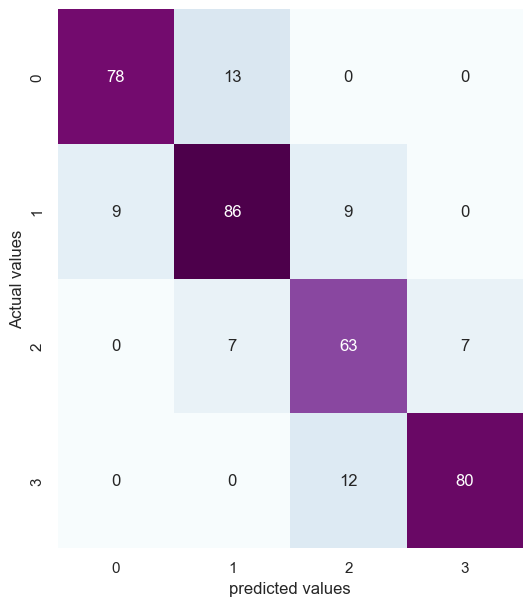

In [123]:
print('Decision Tree:',accuracy_score(Y_test,Y_pred_dt))
cm_rfc=my_confusion_matrix(Y_test,Y_pred_dt, 'Decision Tree')

# Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                          max_depth= 7,
                          max_features= 15,
                          min_samples_leaf= 3,
                          min_samples_split= 10,
                          n_estimators= 200,
                          random_state=7)

rfc.fit(X_train,Y_train)
Y_pred_rfc=rfc.predict(X_test)

print('Random Forest Classifier Score:',accuracy_score(Y_test,Y_pred_rfc))
cm_rfc=my_confusion_matrix(Y_test,Y_pred_rfc, 'Random Forest Classifier Score')

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

(364,)

In [142]:
Y_pred_rf.shape

(364,)

In [146]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("the accuracy score achieved using Decision Tree is:"+str(score_rf))

the accuracy score achieved using Decision Tree is:87.91


#### As cost is very important to the marketing analysis,the model will give people a sharp knowledge about various products price

#### From this strategy a people can find their required product with minimum cost and minimum specification.

#### It determine the price range so a good product can be suggest to a customer.